<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Lab 5.3.1 
# *Support Vector Machines*

SVMs use linear algebra to find an (n-1)-dimensional boundary that separates classes within an n-dimensional space. In practical terms, this technique provides a conceptually simple way to predict class membership from a set of features. 

The standard (linear) SVM is immediately applicable to linear classification problems. Furthermore, by applying transformations to the feature space it is possible to tackle nonlinear classificaiton problems. These transforms are called *kernels*.

### 1. Load Data

Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image. n the 3-dimensional space is that described in: [K. P. Bennett and O. L. Mangasarian: "Robust Linear Programming Discrimination of Two Linearly Inseparable Sets", Optimization Methods and Software 1, 1992, 23-34].

This database is also available through the UW CS ftp server: ftp ftp.cs.wisc.edu cd math-prog/cpo-dataset/machine-learn/WDBC/

Also can be found on UCI Machine Learning Repository: https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29

Attribute Information:

1) ID number 2) Diagnosis (M = malignant, B = benign) 3-32)

Ten real-valued features are computed for each cell nucleus:

a) radius (mean of distances from center to points on the perimeter) b) texture (standard deviation of gray-scale values) c) perimeter d) area e) smoothness (local variation in radius lengths) f) compactness (perimeter^2 / area - 1.0) g) concavity (severity of concave portions of the contour) h) concave points (number of concave portions of the contour) i) symmetry j) fractal dimension ("coastline approximation" - 1)

The mean, standard error and "worst" or largest (mean of the three largest values) of these features were computed for each image, resulting in 30 features. For instance, field 3 is Mean Radius, field 13 is Radius SE, field 23 is Worst Radius.

All feature values are recoded with four significant digits.

Missing attribute values: none

Class distribution: 357 benign, 212 malignant

In [160]:
breast_cancer_csv = 'breast-cancer-wisconsin-data.csv'

In [161]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

### 2. EDA 

- Explore dataset. Clean data (if required)
- Find features to predict class

In [162]:
df = pd.read_csv(breast_cancer_csv)
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [163]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [164]:
df = df.drop('Unnamed: 32', axis=1)

In [165]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [166]:
df.isna().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

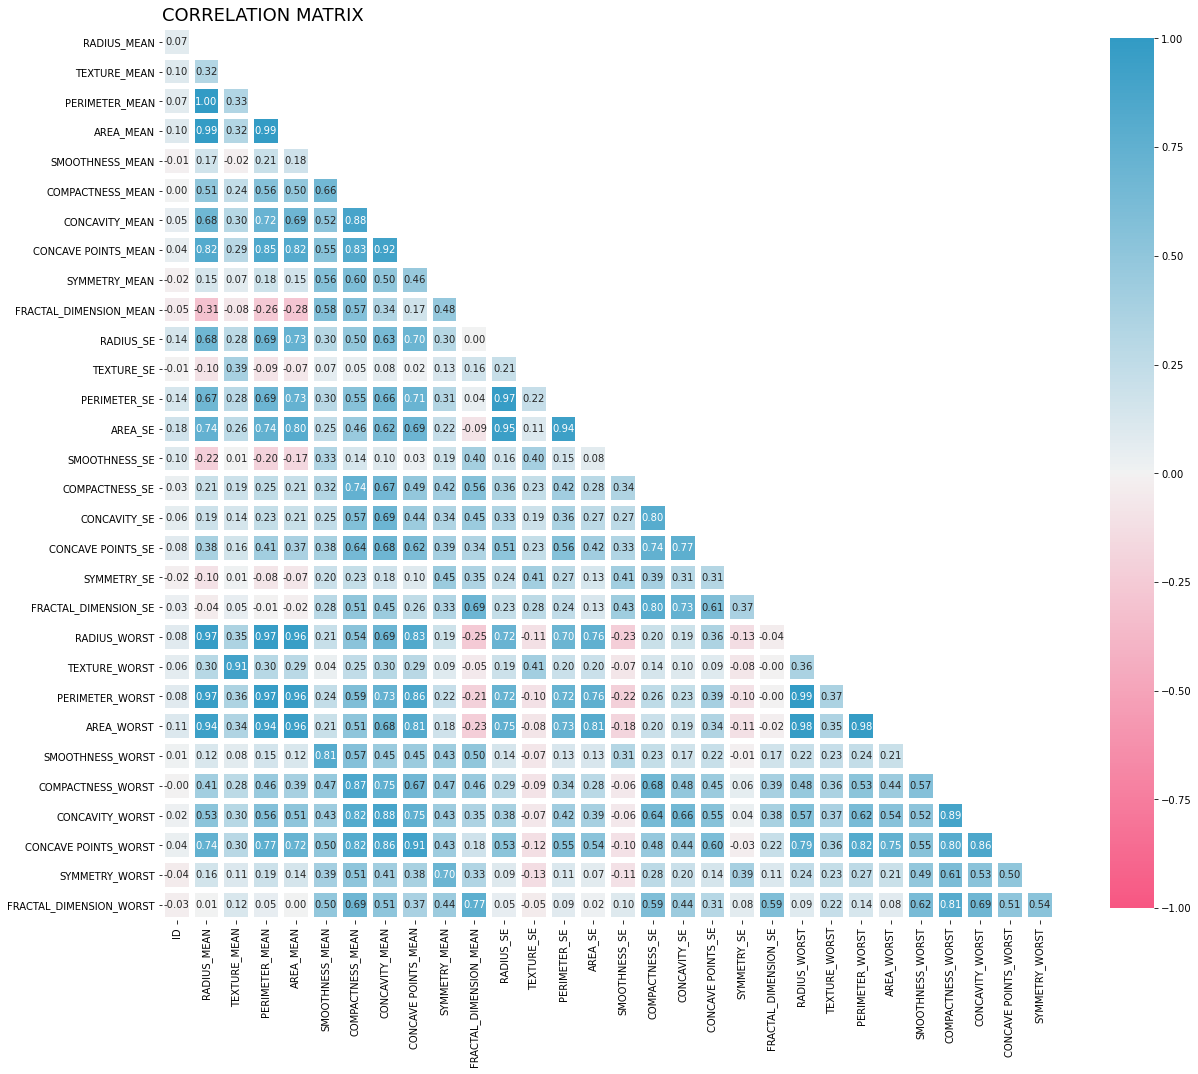

In [167]:
df_corr = df.corr()

fig, ax = plt.subplots(figsize=(20, 20))

# mask
mask = np.triu(np.ones_like(df_corr))

# adjust mask and df
mask = mask[1:, :-1]
corr = df_corr.iloc[1:,:-1].copy()

# color map
cmap = sns.diverging_palette(0, 230, 90, 60, as_cmap=True)

# plot heatmap
sns.heatmap(corr, mask=mask, annot=True, fmt=".2f", 
           linewidths=5, cmap=cmap, vmin=-1, vmax=1, 
           cbar_kws={"shrink": .8}, square=True)

# ticks
yticks = [i.upper() for i in corr.index]
xticks = [i.upper() for i in corr.columns]
plt.yticks(plt.yticks()[0], labels=yticks, rotation=0)
plt.xticks(plt.xticks()[0], labels=xticks)

# title
title = 'CORRELATION MATRIX'
plt.title(title, loc='left', fontsize=18)
plt.show()

### 3. Logistic Regression Model

#### 3.1 Use Logistic Regression

Use Logistic Regression and examine accuracy score, confusion matrix, classification report for that model.

- Define Target, Predictors
- Train-Test Split
- Evaluate Model

In [168]:
diagnosis_dummies = pd.get_dummies(df['diagnosis'],drop_first=True)
df_dummies = pd.concat([df, diagnosis_dummies],axis=1)
df_dummies = df_dummies.drop('diagnosis', axis=1)
df_dummies = df_dummies.rename(columns={'M': 'diagnosis'})
df_dummies

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis
0,842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,1
1,842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,1
2,84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,1
3,84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,1
4,84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,1
565,926682,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,1
566,926954,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,1
567,927241,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,1


In [169]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, roc_auc_score, confusion_matrix
from sklearn.linear_model import LogisticRegression

X = df_dummies.iloc[:, 1:-1].values
y = df_dummies.iloc[:, -1].values

# Create training and test data sets
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.25, random_state=1)

# Feature Scaling # to bring all features to the same level of magnitudes
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Create Model
logreg_model = LogisticRegression(random_state = 1)

# Evaluate Model
logreg_model.fit(X_train, y_train)

# Predict Results
y_pred = logreg_model.predict(X_test)

# Create Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[87  1]
 [ 2 53]]


In [170]:
# Calculate Accuracy
from sklearn.model_selection import cross_val_score

accuracies = cross_val_score(estimator = logreg_model, X = X_train, y = y_train, cv=10)
# cv = 10 represents the number of k folds

print('Accuracy : {:.2f} %'.format(accuracies.mean()*100))
print('Standard Deviation : {:.2f} %'.format(accuracies.std()*100))

Accuracy : 96.96 %
Standard Deviation : 2.33 %


### 4. Support Vector Machine

#### 4.1 Use Support Vector Machine

Use Support Vector Machine and examine accuracy score, confusion matrix, classification report for that model.

- Define Target, Predictors
- Train-Test Split
- Evaluate Model

[[86  2]
 [ 3 52]]
/n
              precision    recall  f1-score   support

           0       0.97      0.98      0.97        88
           1       0.96      0.95      0.95        55

    accuracy                           0.97       143
   macro avg       0.96      0.96      0.96       143
weighted avg       0.97      0.97      0.96       143



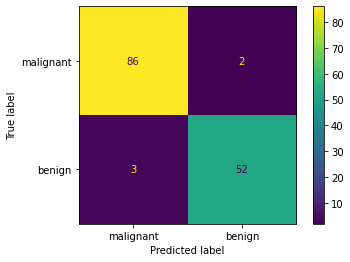

In [203]:
from sklearn import svm

# Define Target, Predictors
X = df_dummies.iloc[:, 1:-1].values
y = df_dummies.iloc[:, -1].values

# Train-Test Split
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.25, random_state=1)

# Feature Scaling # to bring all features to the same level of magnitudes
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Create model
from sklearn.svm import SVC
svc_model = SVC(probability=True)

# Fit the model to the training data
svc_model.fit(X_train, y_train) 

# Predict with test data
predictions = svc_model.predict(X_test)

# Confusion Matrix & Classification Report
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, predictions))
print('/n')
print(classification_report(y_test, predictions))

# Plot graph
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(svc_model, X_test, y_test, values_format='d', display_labels=['malignant', 'benign'])

In [204]:
# To improve model
# GridSearch & Train   # GridSearch to find the right parameters such as what C or gamma values to use
from sklearn.model_selection import GridSearchCV
param_grid = {'C':[0.1,1,10,100,1000], 'gamma':[1,0.1, 0.01,0.001,0.0001]}
grid_model = GridSearchCV(SVC(), param_grid, verbose=3)

# Train
grid_model.fit(X_train, y_train)
print('GridSearch Result: ', grid_model.best_params_)
# A large C value gives you low bias and high variance in the model or vice versa.
# A large Gamma value is going to lead to a high bias and low variance in the model or vice versa.
# if the Gamma is large then the variance is small implying that the support vector does not have a widespread influence.

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END .................................C=0.1, gamma=1; total time=   0.0s
[CV 2/5] END .................................C=0.1, gamma=1; total time=   0.0s
[CV 3/5] END .................................C=0.1, gamma=1; total time=   0.0s
[CV 4/5] END .................................C=0.1, gamma=1; total time=   0.0s
[CV 5/5] END .................................C=0.1, gamma=1; total time=   0.0s
[CV 1/5] END ...............................C=0.1, gamma=0.1; total time=   0.0s
[CV 2/5] END ...............................C=0.1, gamma=0.1; total time=   0.0s
[CV 3/5] END ...............................C=0.1, gamma=0.1; total time=   0.0s
[CV 4/5] END ...............................C=0.1, gamma=0.1; total time=   0.0s
[CV 5/5] END ...............................C=0.1, gamma=0.1; total time=   0.0s
[CV 1/5] END ..............................C=0.1, gamma=0.01; total time=   0.0s
[CV 2/5] END ..............................C=0.

In [205]:
best_estimator = grid_model.best_estimator_
print("Best Estimator: ", best_estimator)

Best Estimator:  SVC(C=10, gamma=0.01)


[[86  2]
 [ 4 51]]
/n
              precision    recall  f1-score   support

           0       0.96      0.98      0.97        88
           1       0.96      0.93      0.94        55

    accuracy                           0.96       143
   macro avg       0.96      0.95      0.96       143
weighted avg       0.96      0.96      0.96       143



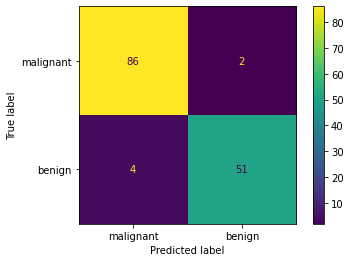

In [206]:
# Predictions and Confusion Matrix & Classification Report
grid_predictions = grid_model.predict(X_test)
print(confusion_matrix(y_test, grid_predictions))
print('/n')
print(classification_report(y_test, grid_predictions))

# Plot graph
plot_confusion_matrix(grid_model, X_test, y_test, values_format='d', display_labels=['malignant', 'benign'])

### 5. Naive Bayes
#### 5.1 Use Naive Bayes

Use Naive Bayes and examine accuracy score, confusion matrix, classification report for that model.

- Define Target, Predictors
- Train-Test Split
- Evaluate Model

In [234]:
# Naive Bayes Classifier 

# Define Target, Predictors
X = df_dummies.iloc[:, 1:-1].values
y = df_dummies.iloc[:, -1].values

# Train-Test Split
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.25, random_state=1)

# Feature Scaling # to bring all features to the same level of magnitudes
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Create Model
from sklearn.naive_bayes import GaussianNB 
nb_classifier = GaussianNB() 

# Fit with training data
nb_classifier.fit(X_train, y_train) 

# Predict with test data
y_pred_nb = nb_classifier.predict(X_test) 

# Accuracy score
accuracy_score = accuracy_score(y_test, y_pred_nb)
print("Accuracy score: ", accuracy_score)

print(classification_report(y_test, y_pred))

TypeError: 'numpy.float64' object is not callable

### 6 Gridsearch optimal parameters for all three models.

Is there any difference between accuracy score of Logistic Regression and SVM? Use grid serach to find optimal parameter for both these models.

> Hyper-parameters are parameters that are not directly learnt within estimators. In scikit-learn they are passed as arguments to the constructor of the estimator classes. Typical examples include C, kernel and gamma for Support Vector Classifier, alpha for Lasso, etc.

> It is possible and recommended to search the hyper-parameter space for the best cross validation score.

> https://scikit-learn.org/stable/modules/grid_search.html#grid-search

**Note:** It'll take time to execute this. After running the cell, wait for result.

#### 6.1 Find Best Estimator For Logistic Regression 

Find out how these parameters effect model. Find out the best estimator, score.

In [208]:
logreg_model.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': 1,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [209]:
lr_params = {
    'C': [1, 10, 100]
}

In [210]:
#bm_map = {
#    'B': 0, 
#    'M': 1
#}

#df['diagnosis'] = df['diagnosis'].map(bm_map)

In [211]:
target_col = 'diagnosis'
feature_cols = [c for c in df.columns if c != target_col]

X = df[feature_cols]
y = df[target_col]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [212]:
logreg = LogisticRegression()

gs = GridSearchCV(logreg, param_grid=lr_params, scoring='accuracy', verbose=2, n_jobs=-1) 
#n_jobs uses more processing power in your computer model

gs.fit(X_train, y_train)

Fitting 5 folds for each of 3 candidates, totalling 15 fits


GridSearchCV(estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [1, 10, 100]}, scoring='accuracy', verbose=2)

In [213]:
gs.best_params_

{'C': 1}

In [214]:
gs.score(X_test, y_test)

0.6153846153846154

#### 6.2 Find Best Estimator For SVM

Find out how these parameters effect model. Find out the best estimator, score.

In [215]:
svc_model.get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': True,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [216]:
# define/put parameters in dict format 
svc_params = {
    'C': [1, 10],
}

In [217]:
df_dummies

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis
0,842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,1
1,842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,1
2,84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,1
3,84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,1
4,84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,1
565,926682,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,1
566,926954,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,1
567,927241,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,1


In [218]:
target_col = 'diagnosis'
feature_cols = [c for c in df.columns if c != target_col]

X = df_dummies[feature_cols]
y = df_dummies[target_col]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

df_dummies

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis
0,842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,1
1,842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,1
2,84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,1
3,84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,1
4,84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,1
565,926682,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,1
566,926954,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,1
567,927241,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,1


In [219]:
svc = SVC(probability=True)

gs = GridSearchCV(svc, param_grid=svc_params, scoring='accuracy', verbose=2, n_jobs=-1) 
#n_jobs uses more processing power in your computer model

gs.fit(X_train, y_train)

Fitting 5 folds for each of 2 candidates, totalling 10 fits


GridSearchCV(estimator=SVC(probability=True), n_jobs=-1,
             param_grid={'C': [1, 10]}, scoring='accuracy', verbose=2)

In [220]:
gs.best_params_

{'C': 1}

In [221]:
gs.score(X_test, y_test)

0.6153846153846154

#### 6.3 Plot the ROC curve for the SVM, Logistic Regressions and Naive Bayes on the same plot

Find out which model performs better.

In [222]:
X.shape

(569, 31)

In [223]:
#df_dummies = df_dummies.drop('id', axis=1)

target_col = 'diagnosis'
feature_cols = [c for c in df.columns if c != target_col]

X = df_dummies.iloc[:, :30].values
y = df_dummies.iloc[:, -1].values

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

X.shape

(569, 30)

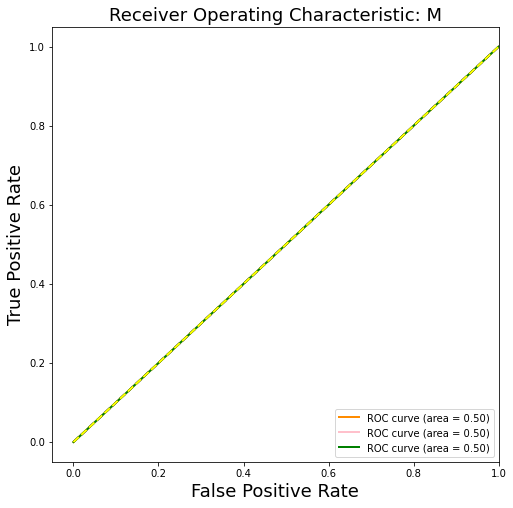

In [228]:
# Plot ROC Curve


# sklearn.metrics.roc_curve(y_true, y_score, *, pos_label=None, sample_weight=None, drop_intermediate=True)

from sklearn import metrics

# Generate the prediction values for each of the test observations using predict_proba() function rather than just predict
logreg_preds = logreg_model.predict_proba(X_test)[:,1]
svc_preds = svc_model.predict_proba(X_test)[:,1]
nb_preds = nb_classifier.predict_proba(X_test)[:,1]

# Store the false positive rate(fpr), true positive rate (tpr) in vectors for use in the graph
logreg_fpr, logreg_tpr, _ = metrics.roc_curve(y_test, logreg_preds)
svc_fpr, svc_tpr, _ = metrics.roc_curve(y_test, svc_preds)
nb_fpr, nb_tpr, _ = metrics.roc_curve(y_test, nb_preds)

# Store the Area Under the Curve (AUC) so we can annotate our graph with theis metric
logreg_roc_auc = metrics.auc(logreg_fpr, logreg_tpr)
svc_roc_auc = metrics.auc(svc_fpr, svc_tpr)
nb_auc = metrics.auc(nb_fpr, nb_tpr)


plt.figure(figsize=[8,8])
lw = 2

plt.plot(logreg_fpr, logreg_tpr, color='darkorange', lw = lw, label = 'ROC curve (area = %0.2f)' % logreg_roc_auc)
plt.plot([0, 1], [0, 1], color = 'navy', lw = lw, linestyle = '--')

plt.plot(svc_fpr, svc_tpr, color='pink', lw = lw, label = 'ROC curve (area = %0.2f)' % svc_roc_auc)
plt.plot([0, 1], [0, 1], color = 'black', lw = lw, linestyle = '--')

plt.plot(nb_fpr, nb_tpr, color='green', lw = lw, label = 'ROC curve (area = %0.2f)' % nb_auc)
plt.plot([0, 1], [0, 1], color = 'yellow', lw = lw, linestyle = '--')

plt.xlim([-0.05, 1.0])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate', fontsize=18)
plt.ylabel('True Positive Rate', fontsize=18)
plt.title('Receiver Operating Characteristic: M', fontsize=18)
plt.legend(loc="lower right")
plt.show()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
421,906564,14.69,13.98,98.22,656.1,0.10310,0.18360,0.145000,0.063000,0.2086,...,16.46,18.34,114.10,809.2,0.13120,0.36350,0.32190,0.11080,0.2827,0.09208
47,85715,13.17,18.66,85.98,534.6,0.11580,0.12310,0.122600,0.073400,0.2128,...,15.67,27.95,102.80,759.4,0.17860,0.41660,0.50060,0.20880,0.3900,0.11790
292,891670,12.95,16.02,83.14,513.7,0.10050,0.07943,0.061550,0.033700,0.1730,...,13.74,19.93,88.81,585.4,0.14830,0.20680,0.22410,0.10560,0.3380,0.09584
186,874217,18.31,18.58,118.60,1041.0,0.08588,0.08468,0.081690,0.058140,0.1621,...,21.31,26.36,139.20,1410.0,0.12340,0.24450,0.35380,0.15710,0.3206,0.06938
414,905680,15.13,29.81,96.71,719.5,0.08320,0.04605,0.046860,0.027390,0.1852,...,17.26,36.91,110.10,931.4,0.11480,0.09866,0.15470,0.06575,0.3233,0.06165
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
232,88203002,11.22,33.81,70.79,386.8,0.07780,0.03574,0.004967,0.006434,0.1845,...,12.36,41.78,78.44,470.9,0.09994,0.06885,0.02318,0.03002,0.2911,0.07307
413,905557,14.99,22.11,97.53,693.7,0.08515,0.10250,0.068590,0.038760,0.1944,...,16.76,31.55,110.20,867.1,0.10770,0.33450,0.31140,0.13080,0.3163,0.09251
514,91594602,15.05,19.07,97.26,701.9,0.09215,0.08597,0.074860,0.043350,0.1561,...,17.58,28.06,113.80,967.0,0.12460,0.21010,0.28660,0.11200,0.2282,0.06954
244,884180,19.40,23.50,129.10,1155.0,0.10270,0.15580,0.204900,0.088860,0.1978,...,21.65,30.53,144.90,1417.0,0.14630,0.29680,0.34580,0.15640,0.2920,0.07614


### 7. [BONUS] Learning Curve

A learning curve shows the validation and training score of an estimator for varying numbers of training samples. It is a tool to find out how much we benefit from adding more training data and whether the estimator suffers more from a variance error or a bias error. If both the validation score and the training score converge to a value that is too low with increasing size of the training set, we will not benefit much from more training data.

Plot "learning curves" for the best models of each. This is a great way see how training/testing size affects the scores. Look at the documentation for how to use this function in sklearn.

http://scikit-learn.org/stable/modules/learning_curve.html#learning-curves

In [92]:
# https://scikit-learn.org/stable/auto_examples/model_selection/plot_learning_curve.html#sphx-glr-auto-examples-model-selection-plot-learning-curve-py

**References**

[Breast Cancer Wisconsin (Diagnostic) Data Set](https://www.kaggle.com/uciml/breast-cancer-wisconsin-data/downloads/breast-cancer-wisconsin-data.zip/2)

[Validation curves: plotting scores to evaluate models](https://scikit-learn.org/stable/modules/learning_curve.html#learning-curves)

[In-Depth: Support Vector Machines](https://jakevdp.github.io/PythonDataScienceHandbook/05.07-support-vector-machines.html)

[Understanding Support Vector Machine algorithm from examples (along with code)](https://www.analyticsvidhya.com/blog/2017/09/understaing-support-vector-machine-example-code/)

[Tuning the hyper-parameters of an estimator](https://scikit-learn.org/stable/modules/grid_search.html#grid-search)



---



---



> > > > > > > > > © 2021 Institute of Data


---



---



